In [62]:
import matplotlib.pyplot as plt 
import numpy as np


In [63]:
from sklearn.datasets import make_blobs

In [64]:
x,y = make_blobs(n_features=2 , n_samples=1000 , centers=3 , random_state=23)

In [65]:
# x.shape
# plt.scatter(x[:,0] , x[:,1])

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest = train_test_split(x,y ,test_size=0.33 , random_state=42)

In [67]:
from sklearn.cluster import KMeans

In [68]:
# manual process 
#  elbow method 

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k ,init='k-means++' )
    kmeans.fit(xtrain)
    wcss.append(kmeans.inertia_)

In [69]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585607,
 1181.365247512756,
 1035.922526516936,
 901.1301866920004,
 827.5188198687358,
 682.5359932617307,
 629.3969832950675,
 592.9735054520261]

Text(0, 0.5, 'wcss')

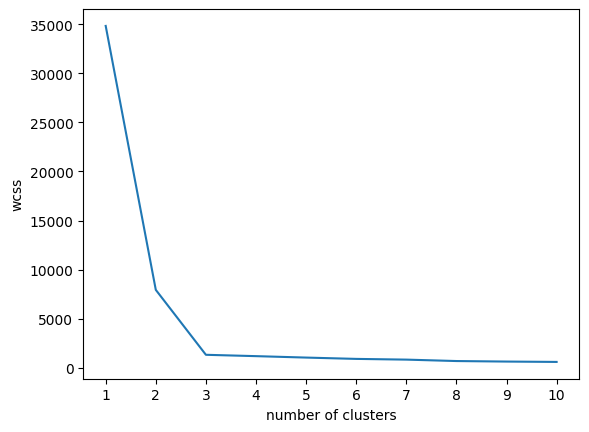

In [70]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("wcss")
# plt.show()

In [71]:
kmeans = KMeans(n_clusters=3 , init='k-means++')

In [72]:
ylabels = kmeans.fit_predict(xtrain)

In [73]:
ytestlabel = kmeans.predict(xtest)

In [74]:
# plt.scatter(xtrain[:,0] , xtrain[:,1] ,c=ylabels)

In [75]:
# plt.scatter(xtest[:,0] , xtest[:,1] ,c=ytestlabel)

In [77]:
# Automating everything 
# !pip install kneed


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11) , wcss , curve='convex' , direction='decreasing')


In [79]:
kl.elbow

3

In [81]:
# peformance metrics
from sklearn.metrics import silhouette_score
score = silhouette_score(xtrain , kmeans.labels_)
score

0.8071181203797672